# Importing libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
carData = pd.read_csv('SG_usedcar.csv')
carData = carData.drop(['Reg_date','Dep','Road Tax','Curb Weight','Manufactured','Transmission','ARF','Power','Engine Cap'],axis=1)

In [3]:
carData.head()

,Brand,Type,Coe_left,Mileage,Dereg Value,COE,OMV,No. of Owners,Price
0,BMW 5 Series 520i Highline,Luxury Sedan,1yr 11mths 21days COE left),N.A,38133,67304,41566,1,54000
1,Honda Vezel 1.5A X Honda Sensing,SUV,4yrs 4mths 7days COE left),50000,31237,56001,19775,2,49800
2,MINI One 1.6A (New 10-yr COE),Hatchback,10yrs COE left),110000,N.A,N.A,18180,3,62800
3,Hyundai Avante 1.6A (COE till 02/2029),Mid-Sized Sedan,7yrs 8mths 5days COE left),N.A,N.A,25727,10763,3,N.A
4,Suzuki Swift Sport 1.6M (COE till 12/2022),Hatchback,1yr 6mths 21days COE left),203000,6656,21349,12154,2,12800


# Cleaning Dataset

In [4]:
#Change N.A to nan
carData = carData.replace('N.A',np.nan)
carData = carData.replace('N.A.',np.nan)
carData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4396 entries, 0 to 4395
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          4396 non-null   object
 1   Type           4396 non-null   object
 2   Coe_left       4388 non-null   object
 3   Mileage        2840 non-null   object
 4   Dereg Value    3446 non-null   object
 5   COE            4138 non-null   object
 6   OMV            3978 non-null   object
 7   No. of Owners  4339 non-null   object
 8   Price          3676 non-null   object
dtypes: object(9)
memory usage: 309.2+ KB


In [5]:
# get the number of missing data points per column
missing_values_count = carData.isnull().sum()
missing_values_count

Brand               0
Type                0
Coe_left            8
Mileage          1556
Dereg Value       950
COE               258
OMV               418
No. of Owners      57
Price             720
dtype: int64

In [6]:
#Removing missing values
carData.dropna(subset=['Brand','Type','Coe_left','Mileage','Dereg Value','No. of Owners','OMV','COE','Price'], inplace=True)
carData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2529 entries, 1 to 4394
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          2529 non-null   object
 1   Type           2529 non-null   object
 2   Coe_left       2529 non-null   object
 3   Mileage        2529 non-null   object
 4   Dereg Value    2529 non-null   object
 5   COE            2529 non-null   object
 6   OMV            2529 non-null   object
 7   No. of Owners  2529 non-null   object
 8   Price          2529 non-null   object
dtypes: object(9)
memory usage: 197.6+ KB


In [7]:
carData.fillna(0, inplace=True)
carData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2529 entries, 1 to 4394
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          2529 non-null   object
 1   Type           2529 non-null   object
 2   Coe_left       2529 non-null   object
 3   Mileage        2529 non-null   object
 4   Dereg Value    2529 non-null   object
 5   COE            2529 non-null   object
 6   OMV            2529 non-null   object
 7   No. of Owners  2529 non-null   object
 8   Price          2529 non-null   object
dtypes: object(9)
memory usage: 197.6+ KB


In [8]:
for i,v in enumerate(carData.Brand):
    wordstr = v.split()
    carData['Brand'].loc[i] = str(wordstr[0]) 
    
# Function to extract main brand
def extract_main_brand(brand):
    if isinstance(brand, str):
        return brand.split()[0]
    else:
        return np.nan

# Extract main brands from the 'Brand' column
carData['Brand'] = carData['Brand'].apply(extract_main_brand)

# Display the modified DataFrame
carData.head()

,Brand,Type,Coe_left,Mileage,Dereg Value,COE,OMV,No. of Owners,Price
1,Suzuki,SUV,4yrs 4mths 7days COE left),50000,31237,56001,19775,2,49800
4,Kia,Hatchback,1yr 6mths 21days COE left),203000,6656,21349,12154,2,12800
5,BMW,Sports Car,6yrs 1mth 12days COE left),21000,106829,50110,71979,1,259988
13,Honda,Mid-Sized Sedan,3yrs 5mths 7days COE left),35000,31339,64900,13856,1,44800
15,BMW,Mid-Sized Sedan,8yrs 27days COE left),21200,38416,30009,18894,1,85800


In [9]:
carData['Brand'].value_counts()

Brand
Mercedes-Benz    423
Honda            355
Toyota           342
BMW              273
Mazda            126
Volkswagen       116
Audi             112
Nissan           107
Mitsubishi        94
Hyundai           88
Kia               62
Subaru            60
Porsche           56
Lexus             52
MINI              37
Volvo             37
Suzuki            34
Chevrolet         15
Peugeot           13
Opel              13
Skoda             12
SEAT              12
McLaren           12
Bentley           12
Land              11
Ford               9
Ferrari            9
Lamborghini        7
Infiniti           6
Maserati           4
Citroen            3
Proton             3
Rolls-Royce        2
Renault            2
Perodua            2
Jaguar             2
Cadillac           2
Hummer             1
Aston              1
Daihatsu           1
Alfa               1
Name: count, dtype: int64

In [10]:
# Function to convert COE left to months
def coe_to_months(coe):
    if isinstance(coe, str):
        coe_parts = coe.split()
        total_months = 0
        for part in coe_parts:
            if 'yr' in part or 'yrs' in part:
                total_months += int(part.strip('yrs').strip('yr')) * 12
            elif 'mth' in part or 'mths' in part:
                total_months += int(part.strip('mths').strip('mth'))
        return total_months
    else:
        return np.nan

# Convert 'Coe_left' to months
carData['Coe_left'] = carData['Coe_left'].apply(coe_to_months)

# Display the modified DataFrame
carData.head()

,Brand,Type,Coe_left,Mileage,Dereg Value,COE,OMV,No. of Owners,Price
1,Suzuki,SUV,52,50000,31237,56001,19775,2,49800
4,Kia,Hatchback,18,203000,6656,21349,12154,2,12800
5,BMW,Sports Car,73,21000,106829,50110,71979,1,259988
13,Honda,Mid-Sized Sedan,41,35000,31339,64900,13856,1,44800
15,BMW,Mid-Sized Sedan,96,21200,38416,30009,18894,1,85800


In [11]:
# create a list of fields to be converted to int
convert_dict = {'Mileage': 'int64','No. of Owners': 'int64','Price': 'int64',
                'Dereg Value':'int64','Type':'category'}
carData = carData.astype(convert_dict)
carData.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2529 entries, 1 to 4394
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Brand          2529 non-null   object  
 1   Type           2529 non-null   category
 2   Coe_left       2529 non-null   int64   
 3   Mileage        2529 non-null   int64   
 4   Dereg Value    2529 non-null   int64   
 5   COE            2529 non-null   object  
 6   OMV            2529 non-null   object  
 7   No. of Owners  2529 non-null   int64   
 8   Price          2529 non-null   int64   
dtypes: category(1), int64(5), object(3)
memory usage: 245.2+ KB


In [12]:
convert_dict = {'Mileage': 'int64','COE': 'int64','OMV': 'int64', 'No. of Owners': 'int64','Price': 'int64','Dereg Value':'int64','Type':'category'}

In [13]:
carData = carData.astype(convert_dict)
carData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2529 entries, 1 to 4394
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Brand          2529 non-null   object  
 1   Type           2529 non-null   category
 2   Coe_left       2529 non-null   int64   
 3   Mileage        2529 non-null   int64   
 4   Dereg Value    2529 non-null   int64   
 5   COE            2529 non-null   int64   
 6   OMV            2529 non-null   int64   
 7   No. of Owners  2529 non-null   int64   
 8   Price          2529 non-null   int64   
dtypes: category(1), int64(7), object(1)
memory usage: 245.2+ KB


# Basic Statistics

In [14]:
carDF=pd.DataFrame(carData[['Brand','Type','Coe_left']])

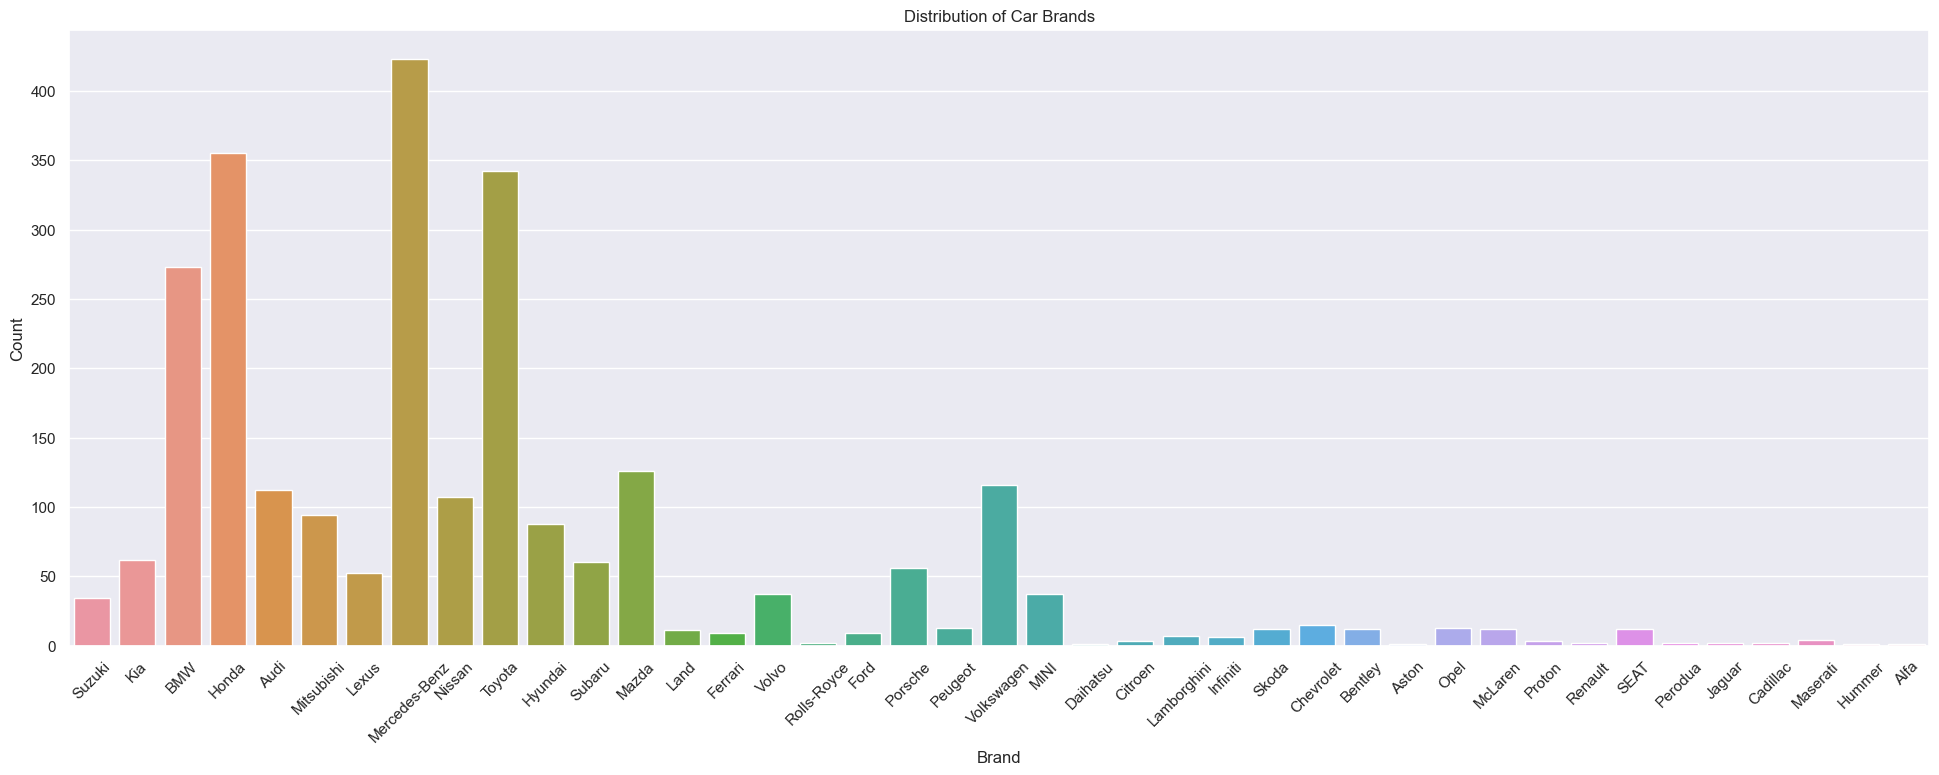

In [15]:
plt.figure(figsize=(24, 8))
sb.countplot(x='Brand', data=carDF)
plt.title('Distribution of Car Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

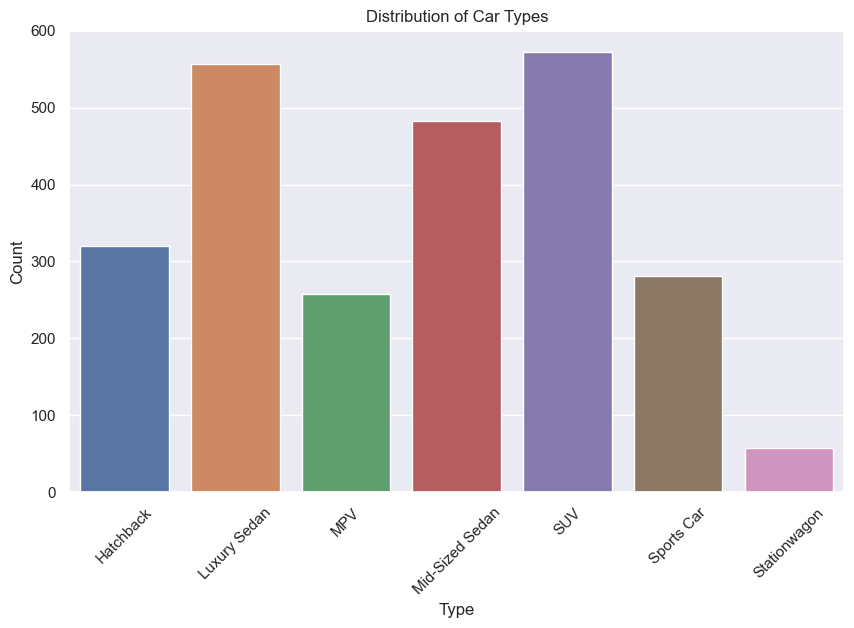

In [16]:
plt.figure(figsize=(10, 6))
sb.countplot(x='Type', data=carDF)
plt.title('Distribution of Car Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

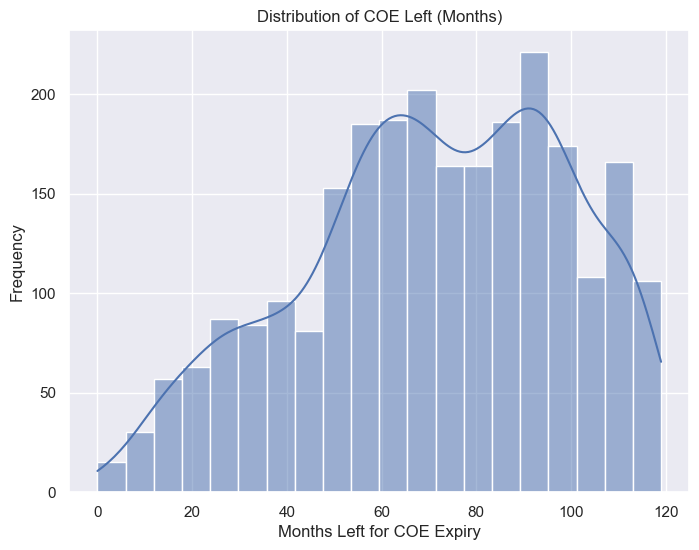

In [17]:
plt.figure(figsize=(8, 6))
sb.histplot(carDF['Coe_left'], bins=20, kde=True)
plt.title('Distribution of COE Left (Months)')
plt.xlabel('Months Left for COE Expiry')
plt.ylabel('Frequency')
plt.show()


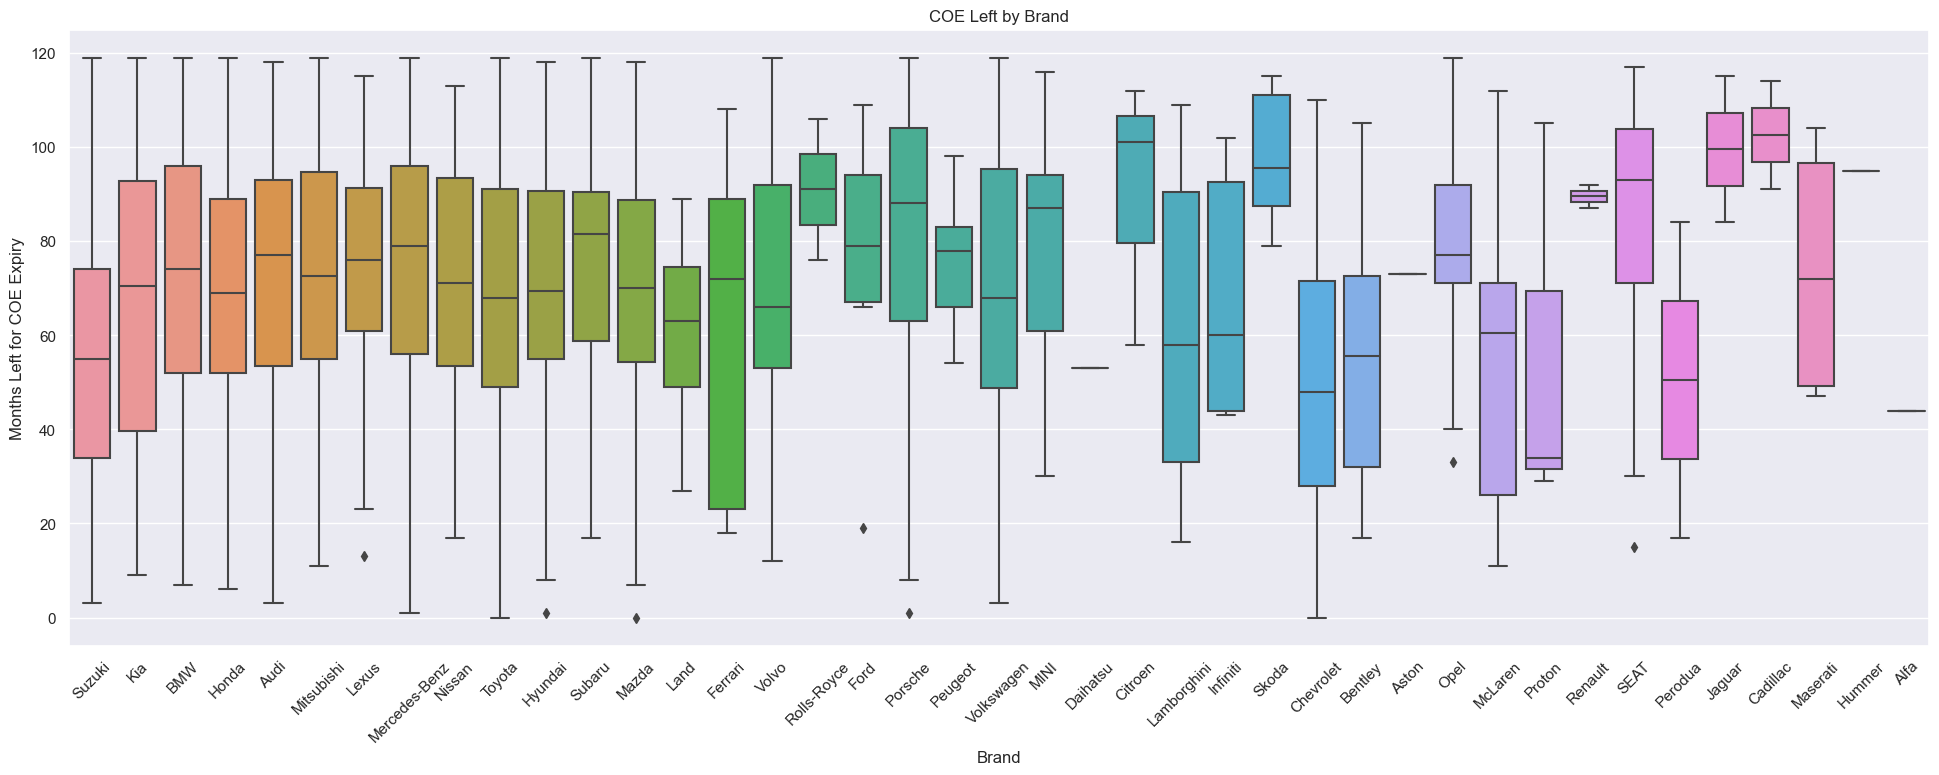

In [18]:
plt.figure(figsize=(24, 8))
sb.boxplot(x='Brand', y='Coe_left', data=carDF)
plt.title('COE Left by Brand')
plt.xlabel('Brand')
plt.ylabel('Months Left for COE Expiry')
plt.xticks(rotation=45)
plt.show()


In [19]:
mileage = pd.DataFrame(carData['Mileage'])
dereg = pd.DataFrame(carData['Dereg Value'])
price = pd.DataFrame(carData['Price'])


<Axes: >

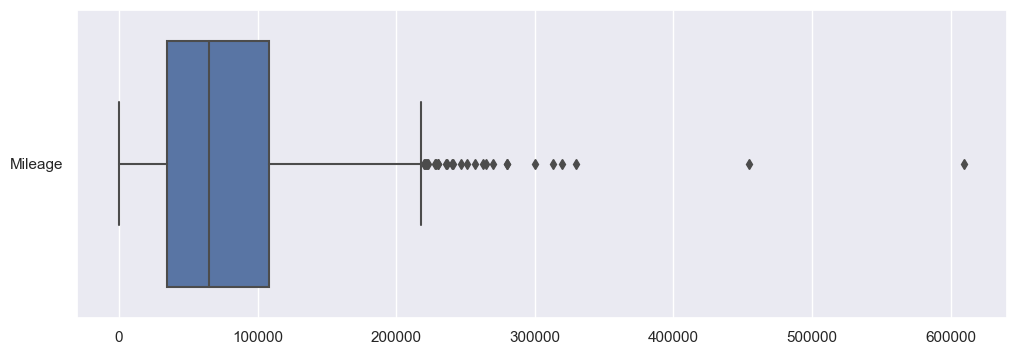

In [20]:
f = plt.figure(figsize=(12, 4))
sb.boxplot(data = mileage, orient = "h")

<Axes: >

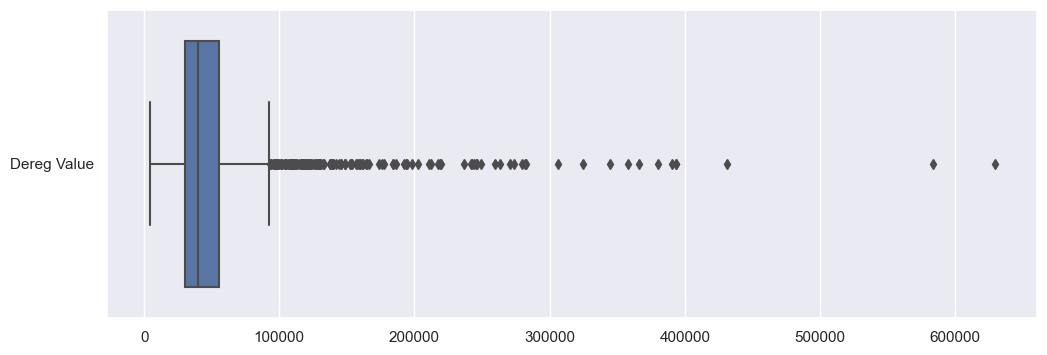

In [21]:
f = plt.figure(figsize=(12, 4))
sb.boxplot(data = dereg, orient = "h")

<Axes: >

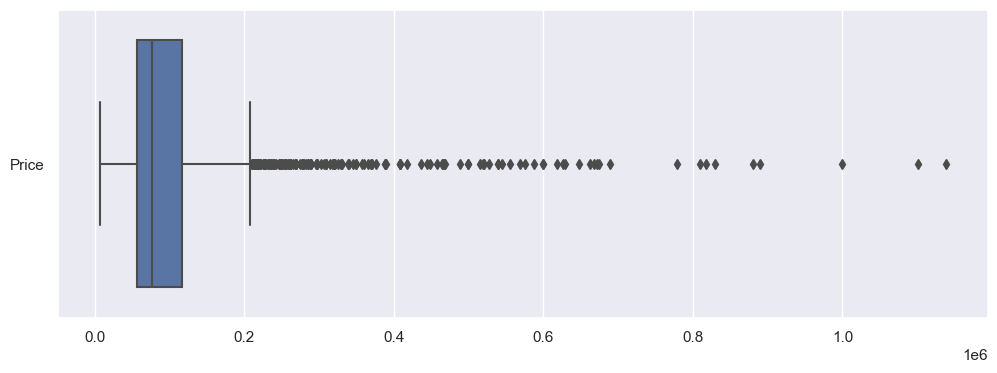

In [22]:
f = plt.figure(figsize=(12, 4))
sb.boxplot(data = price, orient = "h")

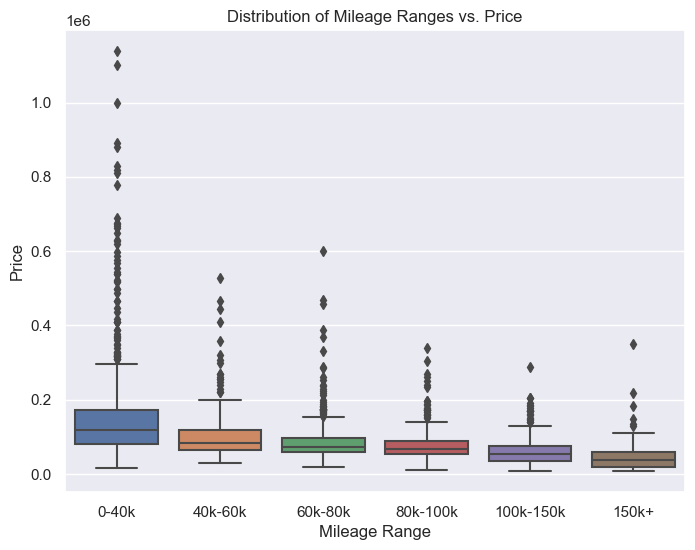

In [23]:
# Define the mileage ranges
mileage_bins = [0, 40000, 60000, 80000, 100000, 150000, float('inf')]
mileage_labels = ['0-40k', '40k-60k', '60k-80k', '80k-100k', '100k-150k', '150k+']

# Create a new column in the DataFrame with mileage ranges
carData['Mileage Range'] = pd.cut(carData['Mileage'], bins=mileage_bins, labels=mileage_labels)

# Plot the boxplot
plt.figure(figsize=(8, 6))
sb.boxplot(x='Mileage Range', y='Price', data=carData)
plt.title('Distribution of Mileage Ranges vs. Price')
plt.xlabel('Mileage Range')
plt.ylabel('Price')
plt.show()

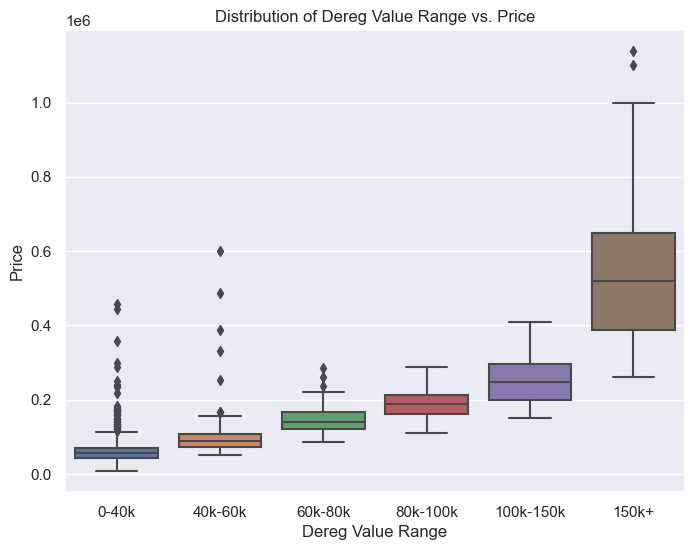

In [24]:
# Define the Dereg Value ranges
dereg_bins = [0, 40000, 60000, 80000, 100000, 150000, float('inf')]
dereg_labels = ['0-40k', '40k-60k', '60k-80k', '80k-100k', '100k-150k', '150k+']

# Create a new column in the DataFrame with Dereg ranges
carData['Dereg Value Range'] = pd.cut(carData['Dereg Value'], bins=dereg_bins, labels=dereg_labels)

# Plot the boxplot
plt.figure(figsize=(8, 6))
sb.boxplot(x='Dereg Value Range', y='Price', data=carData)
plt.title('Distribution of Dereg Value Range vs. Price')
plt.xlabel('Dereg Value Range')
plt.ylabel('Price')
plt.show()

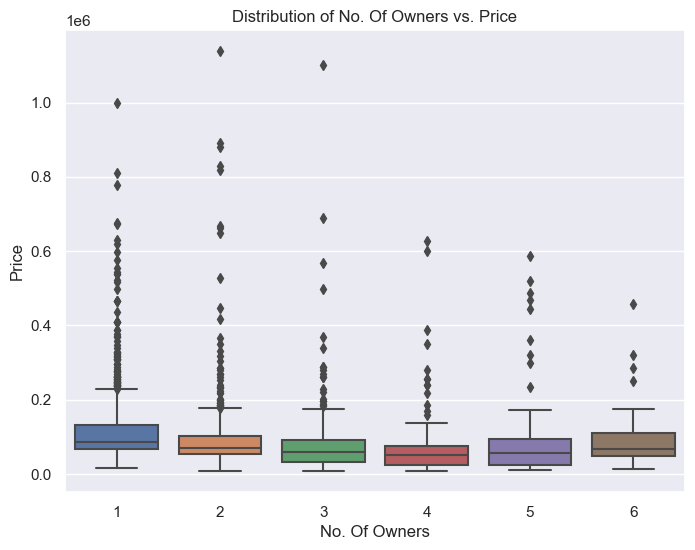

In [25]:
plt.figure(figsize=(8, 6))
sb.boxplot(x='No. of Owners', y='Price', data=carData)
plt.title('Distribution of No. Of Owners vs. Price')
plt.xlabel('No. Of Owners')
plt.ylabel('Price')
plt.show()

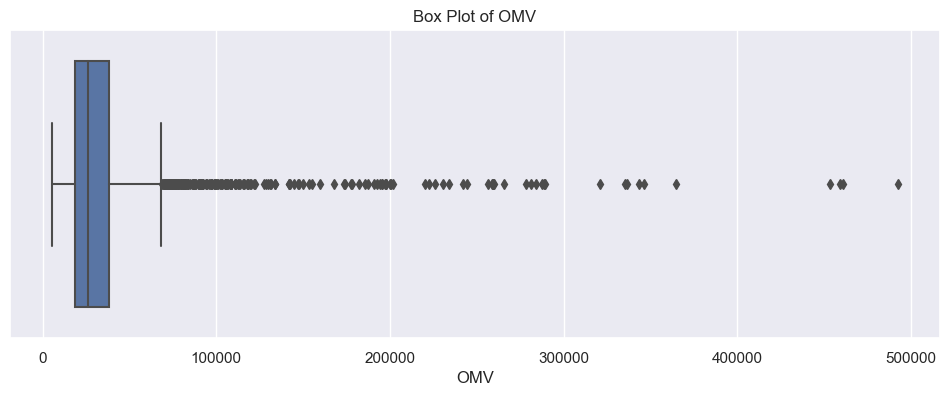

In [29]:
# Plotting the boxplot for the 'OMV' column
plt.figure(figsize=(12, 4))
sb.boxplot(x=carData['OMV'], orient="h")
plt.title('Box Plot of OMV')
plt.xlabel('OMV')
plt.show()


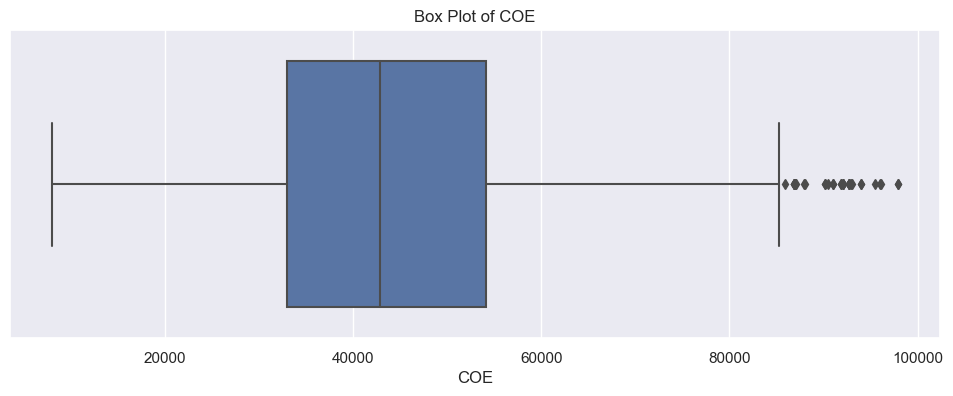

In [30]:
# Plotting the boxplot for the 'COE' column
plt.figure(figsize=(12, 4))
sb.boxplot(x=carData['COE'], orient="h")
plt.title('Box Plot of COE')
plt.xlabel('COE')
plt.show()
